In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=pd.read_csv(
    "C:/Users/marti/OneDrive/Documentos/personal/Universidad/Econometria/ProblemSets/Advertising.csv")
#Resumen datos
print(data.shape,data.columns)
data.info()

(200, 5) Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


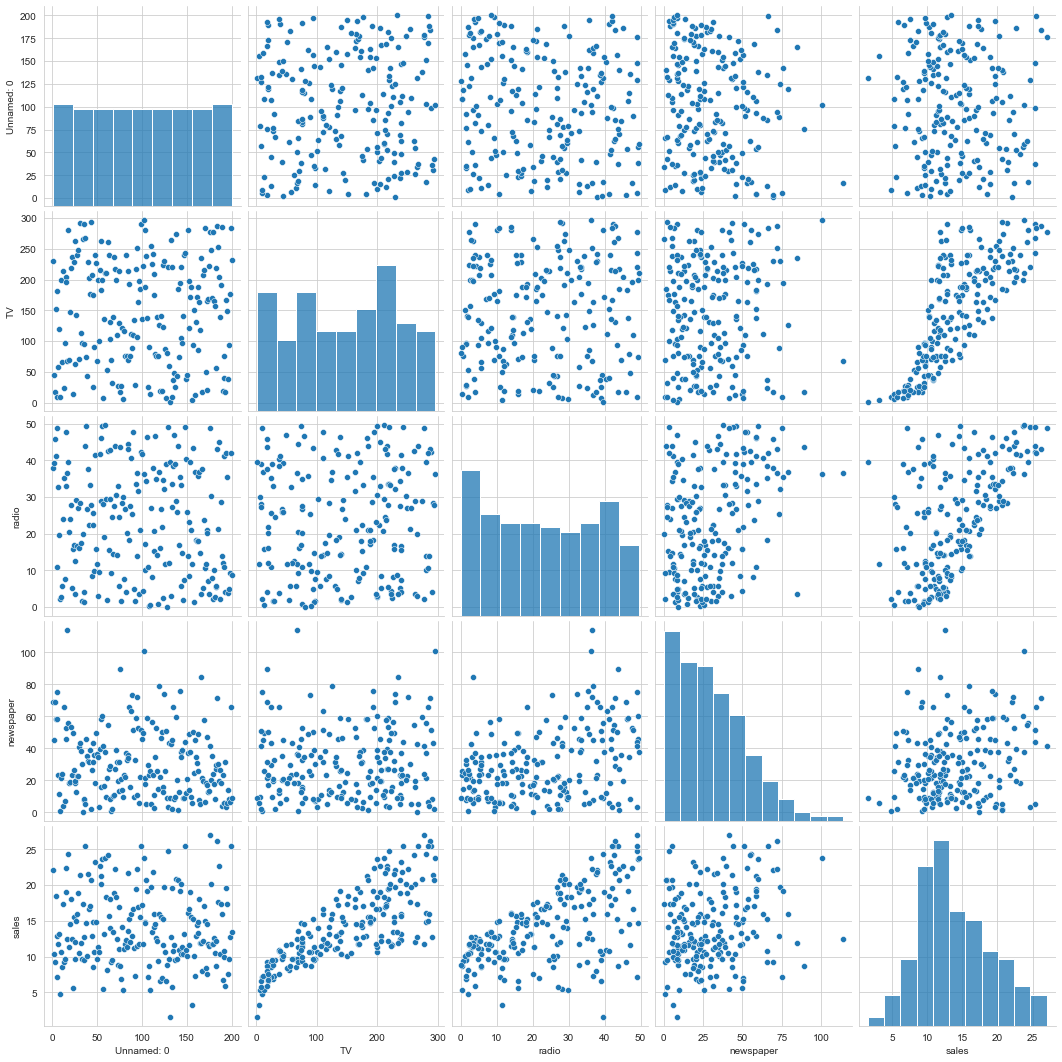

In [3]:
#data.plot(kind='scatter',x='TV',y='sales')#bivariado
#par a par
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,height=3)
plt.show()

In [ ]:
X = sm.add_constant(columnas_regresores)
reg = sm.OLS(columna_y,X)
model_fit=reg.fit()
print(model_fit.summary())

In [ ]:
# names = ['Lagrange multiplier statistic', 'p-value',
#         'f-value', 'f p-value']
# test = sms.het_breuschpagan(results2.resid, results2.model.exog)

# lzip(names,test)

plt.style.use('seaborn') # pretty matplotlib plots

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

model_exog=model_fit.model.exog
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)

In [ ]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x = model_fitted_y[:500],
                    y = model_residuals[:500],
                    data = data_reg3,
                    lowess = True)
  
# show the plot


plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plt.show()

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)